
# IMPORT LIBRARIES, DATA and DATA CLEANING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving database.csv to database (1).csv


In [3]:
data = pd.read_csv("database.csv")
data.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [4]:
dataset_shape = data.shape

columns = data.columns.tolist()

print(f"Dataset shape (rows, columns): {dataset_shape}")
print("Columns:", columns)

Dataset shape (rows, columns): (23412, 21)
Columns: ['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


In [5]:
data = data[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
data.head()

Date      Time  Latitude  Longitude  Depth  Magnitude
0  01/02/1965  13:44:18    19.246    145.616  131.6        6.0
1  01/04/1965  11:29:49     1.863    127.352   80.0        5.8
2  01/05/1965  18:05:58   -20.579   -173.972   20.0        6.2
3  01/08/1965  18:49:43   -59.076    -23.557   15.0        5.8
4  01/09/1965  13:32:50    11.938    126.427   15.0        5.8

In [6]:
import datetime
import time

timestamp = []
for d, t in zip(data['Date'], data['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        timestamp.append('ValueError')
timeStamp = pd.Series(timestamp)
data['Timestamp'] = timeStamp.values
final_data = data.drop(['Date', 'Time'], axis=1)
final_data = final_data[final_data.Timestamp != 'ValueError']
final_data.head()

Latitude  Longitude  Depth  Magnitude    Timestamp
0    19.246    145.616  131.6        6.0 -157630542.0
1     1.863    127.352   80.0        5.8 -157465811.0
2   -20.579   -173.972   20.0        6.2 -157355642.0
3   -59.076    -23.557   15.0        5.8 -157093817.0
4    11.938    126.427   15.0        5.8 -157026430.0

In [7]:
missing_values = final_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Latitude     0
Longitude    0
Depth        0
Magnitude    0
Timestamp    0
dtype: int64


In [8]:
print("Data types in each column:")
print(final_data.dtypes)

Data types in each column:
Latitude     float64
Longitude    float64
Depth        float64
Magnitude    float64
Timestamp     object
dtype: object


In [9]:
duplicates = final_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [10]:
from scipy.stats import zscore

numerical_columns = ['Latitude', 'Longitude', 'Depth', 'Magnitude']
z_scores = np.abs(zscore(final_data[numerical_columns]))
threshold = 3

outliers = (z_scores > threshold).sum(axis=1)
num_outliers = (outliers > 0).sum()

print(f"Number of outliers: {num_outliers}")

Number of outliers: 1461


In [11]:
final_data_no_outliers = final_data[(np.abs(zscore(final_data[numerical_columns])) <= threshold).all(axis=1)]

print("Shape of dataset after removing outliers:", final_data_no_outliers.shape)

Shape of dataset after removing outliers: (21948, 5)


# Dependant vs Independant variable

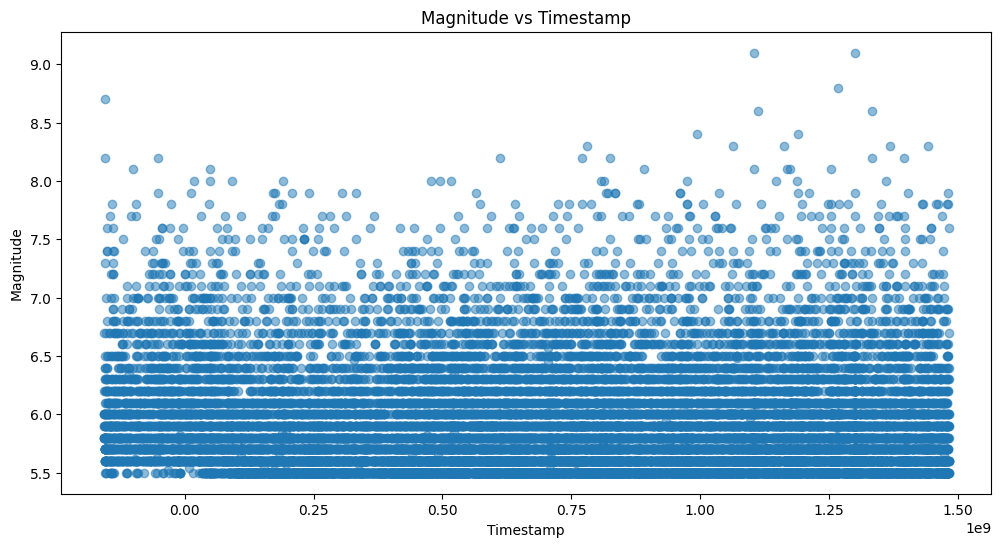

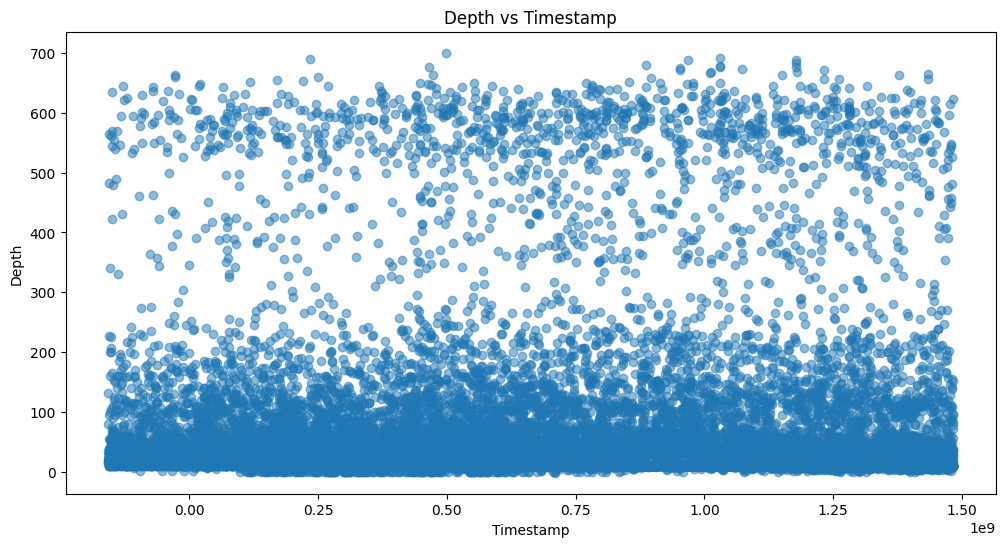

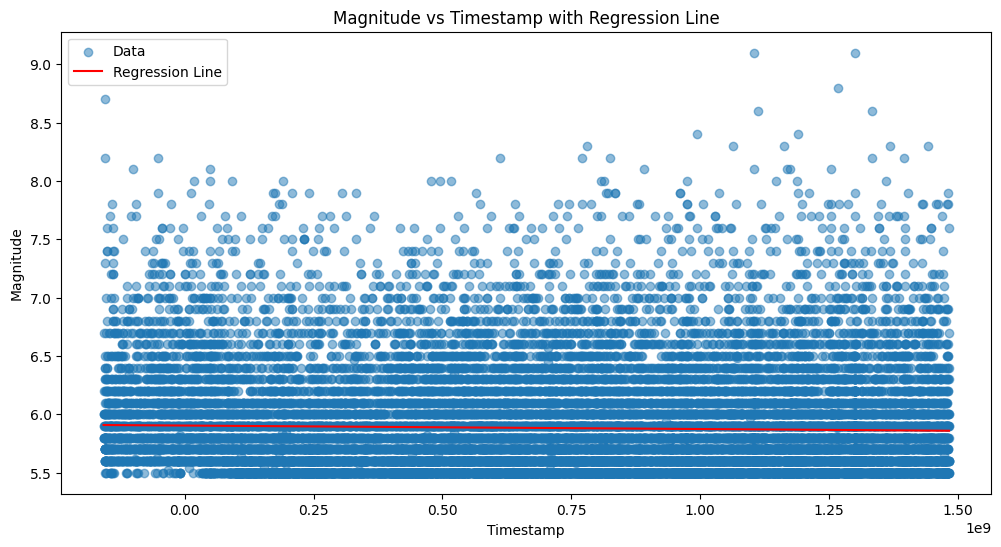

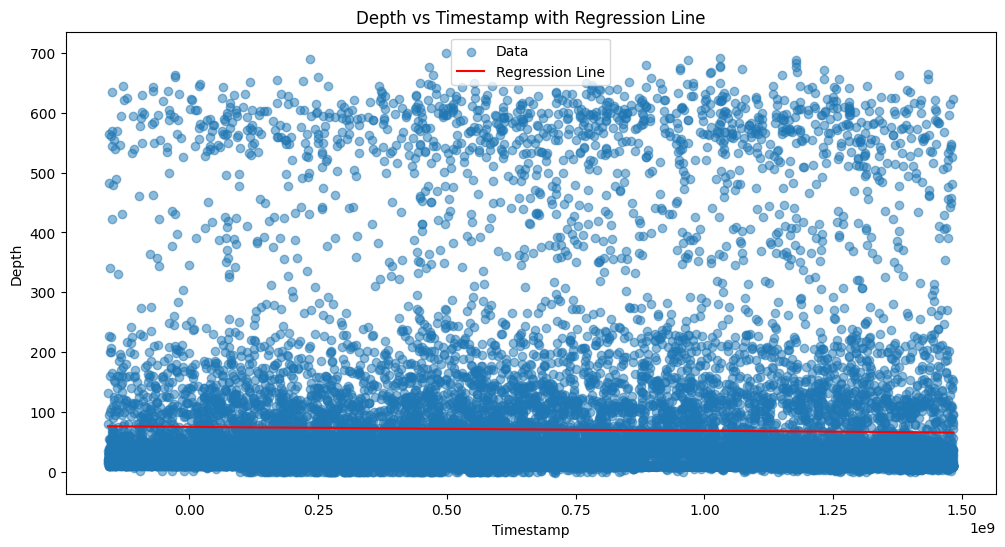

Magnitude vs Time:
Coefficient: -2.9770737048775516e-11
Intercept: 5.904292186437244
R^2 Score: 0.001026357724996152

Depth vs Time:
Coefficient: -6.383552043026016e-09
Intercept: 75.40876113320019
R^2 Score: 0.0005619227771503921


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

plt.figure(figsize=(12, 6))
plt.scatter(final_data['Timestamp'], final_data['Magnitude'], alpha=0.5)
plt.title('Magnitude vs Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Magnitude')
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(final_data['Timestamp'], final_data['Depth'], alpha=0.5)
plt.title('Depth vs Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Depth')
plt.show()

X = final_data[['Timestamp']]
y_magnitude = final_data['Magnitude']
model_magnitude = LinearRegression().fit(X, y_magnitude)
y_magnitude_pred = model_magnitude.predict(X)

y_depth = final_data['Depth']
model_depth = LinearRegression().fit(X, y_depth)
y_depth_pred = model_depth.predict(X)

magnitude_r2 = r2_score(y_magnitude, y_magnitude_pred)
depth_r2 = r2_score(y_depth, y_depth_pred)

plt.figure(figsize=(12, 6))
plt.scatter(final_data['Timestamp'], final_data['Magnitude'], alpha=0.5, label='Data')
plt.plot(final_data['Timestamp'], y_magnitude_pred, color='red', label='Regression Line')
plt.title('Magnitude vs Timestamp with Regression Line')
plt.xlabel('Timestamp')
plt.ylabel('Magnitude')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(final_data['Timestamp'], final_data['Depth'], alpha=0.5, label='Data')
plt.plot(final_data['Timestamp'], y_depth_pred, color='red', label='Regression Line')
plt.title('Depth vs Timestamp with Regression Line')
plt.xlabel('Timestamp')
plt.ylabel('Depth')
plt.legend()
plt.show()

print("Magnitude vs Time:")
print(f"Coefficient: {model_magnitude.coef_[0]}")
print(f"Intercept: {model_magnitude.intercept_}")
print(f"R^2 Score: {magnitude_r2}")

print("\nDepth vs Time:")
print(f"Coefficient: {model_depth.coef_[0]}")
print(f"Intercept: {model_depth.intercept_}")
print(f"R^2 Score: {depth_r2}")

In [14]:
!pip install cartopy

In [15]:
!pip install scikeras

# EDA

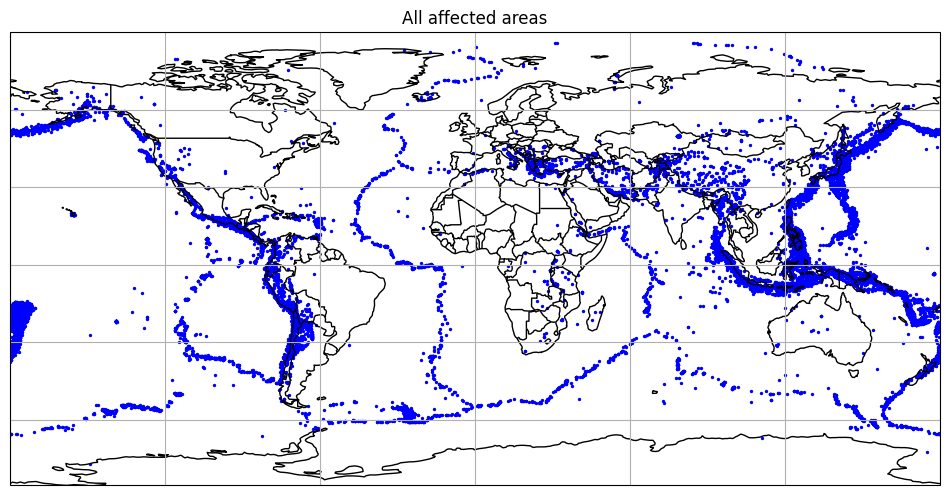

In [16]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title("All affected areas")

ax.scatter(data["Longitude"], data["Latitude"], transform=ccrs.PlateCarree(), s=2, color='blue')

ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.gridlines()

plt.show()

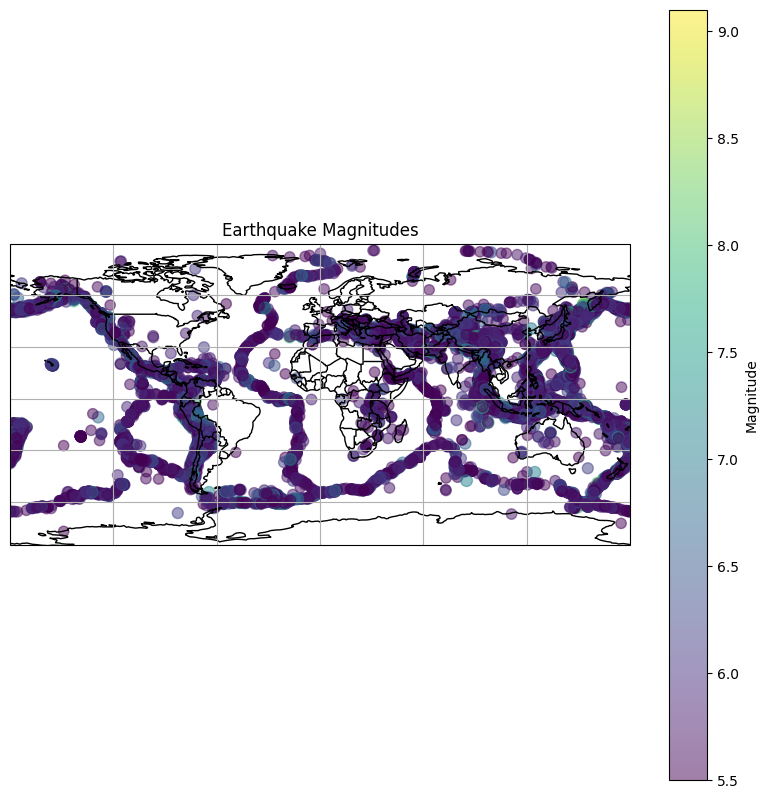

In [17]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title("Earthquake Magnitudes")

sc = ax.scatter(data["Longitude"], data["Latitude"], transform=ccrs.PlateCarree(), s=data["Magnitude"]*10, c=data["Magnitude"], cmap='viridis', alpha=0.5)

plt.colorbar(sc, label='Magnitude')
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.gridlines()

plt.show()

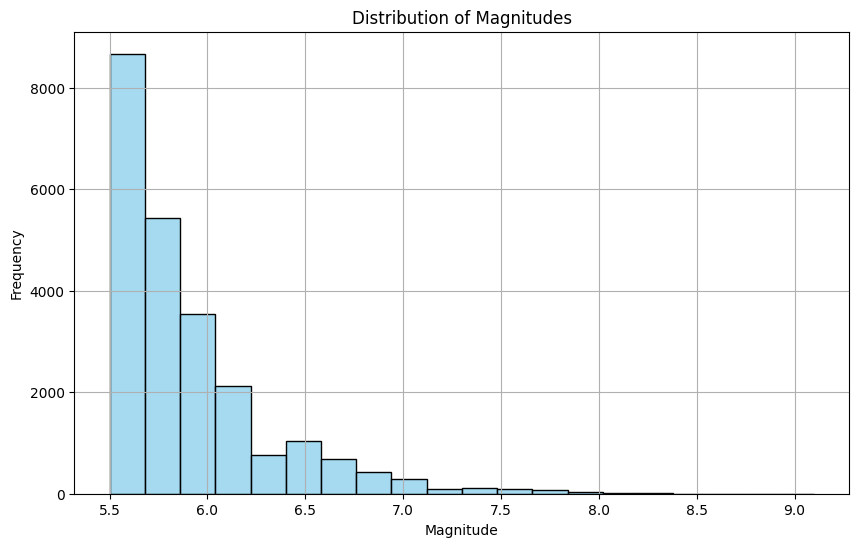

In [18]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(final_data['Magnitude'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title('Distribution of Magnitudes')
plt.grid(True)
plt.show()

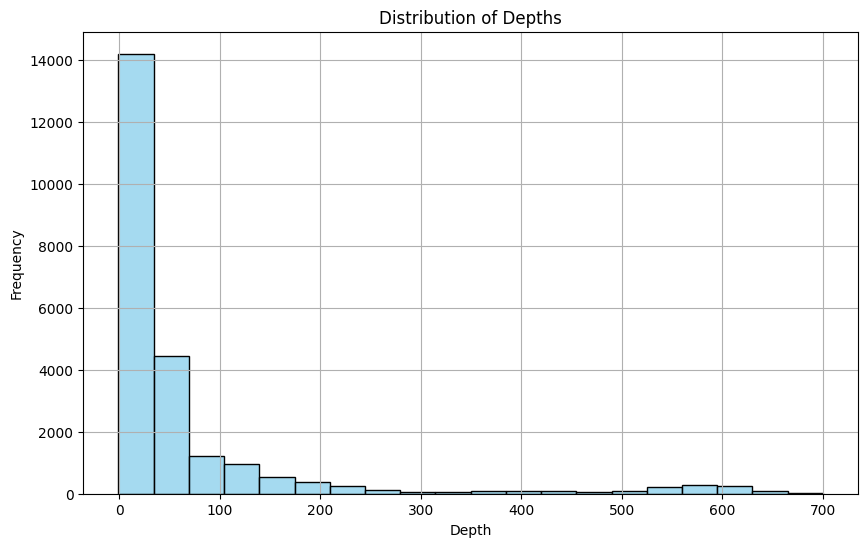

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(final_data['Depth'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.title('Distribution of Depths')
plt.grid(True)
plt.show()

# SPLIT THE MODEL


In [20]:
from sklearn.model_selection import train_test_split

X = final_data[['Latitude', 'Longitude']]
y = final_data[['Magnitude', 'Depth']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(18727, 2) (4682, 2) (18727, 2) (4682, 2)


# ERROR METRICS

In [21]:
import numpy as np

mean_magnitude = np.mean(data['Magnitude'])
mean_depth = np.mean(data['Depth'])

print("Mean Magnitude:", mean_magnitude)
print("Mean Depth:", mean_depth)

Mean Magnitude: 5.882530753459764
Mean Depth: 70.76791124209807


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_magnitude = y_train['Magnitude'].mean()
mean_depth = y_train['Depth'].mean()

mean_magnitude_guesses = np.full_like(y_test['Magnitude'], mean_magnitude)
mean_depth_guesses = np.full_like(y_test['Depth'], mean_depth)

mean_magnitude_mse = mean_squared_error(y_test['Magnitude'], mean_magnitude_guesses)
mean_magnitude_mae = mean_absolute_error(y_test['Magnitude'], mean_magnitude_guesses)
mean_depth_mse = mean_squared_error(y_test['Depth'], mean_depth_guesses)
mean_depth_mae = mean_absolute_error(y_test['Depth'], mean_depth_guesses)

print("Error Metrics for Mean Magnitude Guess:")
print("Mean Squared Error (MSE):", mean_magnitude_mse)
print("Mean Absolute Error (MAE):", mean_magnitude_mae)
print("\nError Metrics for Mean Depth Guess:")
print("Mean Squared Error (MSE):", mean_depth_mse)
print("Mean Absolute Error (MAE):", mean_depth_mae)

Error Metrics for Mean Magnitude Guess:
Mean Squared Error (MSE): 0.18593262501498964
Mean Absolute Error (MAE): 0.316242823804348

Error Metrics for Mean Depth Guess:
Mean Squared Error (MSE): 15138.50958826989
Mean Absolute Error (MAE): 70.56866857986263


# Neural Network model 1

In [23]:
from keras.models import Sequential
from keras.layers import Dense

def create_model(neurons, activation, optimizer='adam', loss='mean_squared_error'):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(2,)))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(2, activation='softmax'))

    model.compile(optimizer=optimizer, loss=loss, metrics=['mae', 'mse'])

    return model

In [24]:
from scikeras.wrappers import KerasRegressor

neurons = 16
activation = 'relu'
optimizer = 'adam'
loss = 'mean_squared_error'

model = KerasRegressor(build_fn=create_model, verbose=0, neurons=neurons, activation=activation, optimizer=optimizer, loss=loss)

batch_size = [32]
epochs = [20]

param_grid = dict(batch_size=batch_size, epochs=epochs)

In [25]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best: -97.935727 using {'batch_size': 32, 'epochs': 20}
-97.935727 (3.807639) with: {'batch_size': 32, 'epochs': 20}


# Best Parameters

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'mse'])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])
history = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1, validation_data=(X_test, y_test))

[test_loss, mae, mse] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, MAE = {}, MSE = {}".format(test_loss, mae, mse))

[test_loss, test_mae, test_mse] = model.evaluate(X_test, y_test)
print("Evaluation result on Test Data : Loss = {}, MAE = {}, MSE = {}".format(test_loss, test_mae, test_mse))

y_pred = model.predict(X_test)

y_test_array = np.array(y_test)

y_magnitude_pred = y_pred[:, 0]

magnitude_mae = mean_absolute_error(y_test_array[:, 0], y_magnitude_pred)
magnitude_mse = mean_squared_error(y_test_array[:, 0], y_magnitude_pred)

print("\nMagnitude Prediction Error Metrics:")
print("Mean Absolute Error (MAE) for Magnitude Prediction:", magnitude_mae)
print("Mean Squared Error (MSE) for Magnitude Prediction:", magnitude_mse)

y_depth_pred = y_pred[:, 1]

depth_mae = mean_absolute_error(y_test_array[:, 1], y_depth_pred)
depth_mse = mean_squared_error(y_test_array[:, 1], y_depth_pred)

print("\nDepth Prediction Error Metrics:")
print("Mean Absolute Error (MAE) for Depth Prediction:", depth_mae)
print("Mean Squared Error (MSE) for Depth Prediction:", depth_mse)

Epoch 1/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 7458.6333 - mae: 37.8106 - mse: 7458.6333 - val_loss: 7007.2578 - val_mae: 34.2672 - val_mse: 7007.2578
Epoch 2/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7017.2690 - mae: 34.4813 - mse: 7017.2690 - val_loss: 6922.9546 - val_mae: 32.7157 - val_mse: 6922.9546
Epoch 3/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7083.4106 - mae: 34.4103 - mse: 7083.4106 - val_loss: 6870.2461 - val_mae: 33.2797 - val_mse: 6870.2461
Epoch 4/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6785.3086 - mae: 33.4249 - mse: 6785.3086 - val_loss: 6855.7769 - val_mae: 34.2340 - val_mse: 6855.7769
Epoch 5/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6801.0566 - mae: 33.4552 - mse: 6801.0566 - val_loss: 6805.7729 - val_mae: 34.3243 - val_mse: 6805.7729
Epoch 6/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6638.4106 - mae: 32.8672 - mse: 6638.4106 - val_loss: 6788.0366 - val_mae: 32.0588 - val_mse: 6788.0366
Epoch 7/10

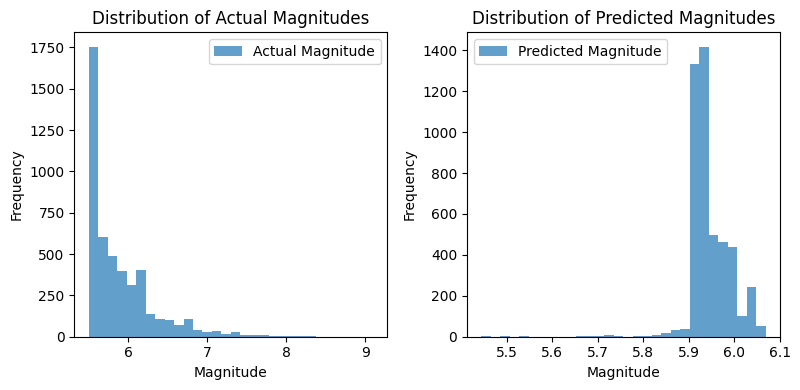

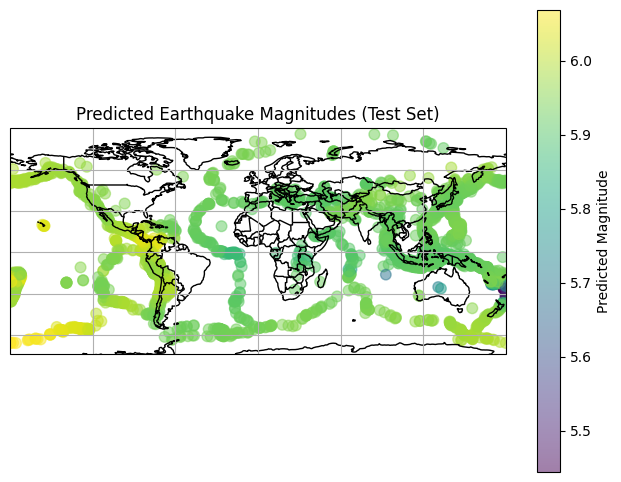

In [27]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.hist(y_test_array[:, 0], bins=30, alpha=0.7, label='Actual Magnitude')
plt.title('Distribution of Actual Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(y_magnitude_pred, bins=30, alpha=0.7, label='Predicted Magnitude')
plt.title('Distribution of Predicted Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

if not isinstance(y_test, pd.DataFrame):
    y_test = pd.DataFrame(y_test, columns=['Magnitude', 'Depth'])

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title("Predicted Earthquake Magnitudes (Test Set)")

sc = ax.scatter(X_test["Longitude"], X_test["Latitude"], transform=ccrs.PlateCarree(), s=y_magnitude_pred*10, c=y_magnitude_pred, cmap='viridis', alpha=0.5)

plt.colorbar(sc, label='Predicted Magnitude')

ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.gridlines()

plt.show()

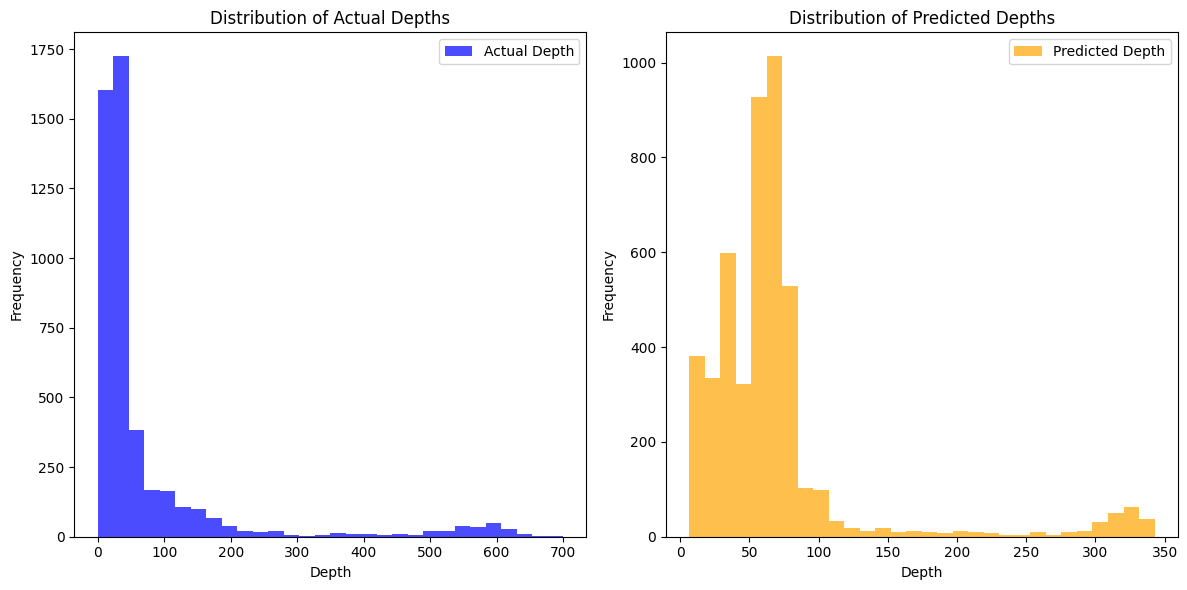

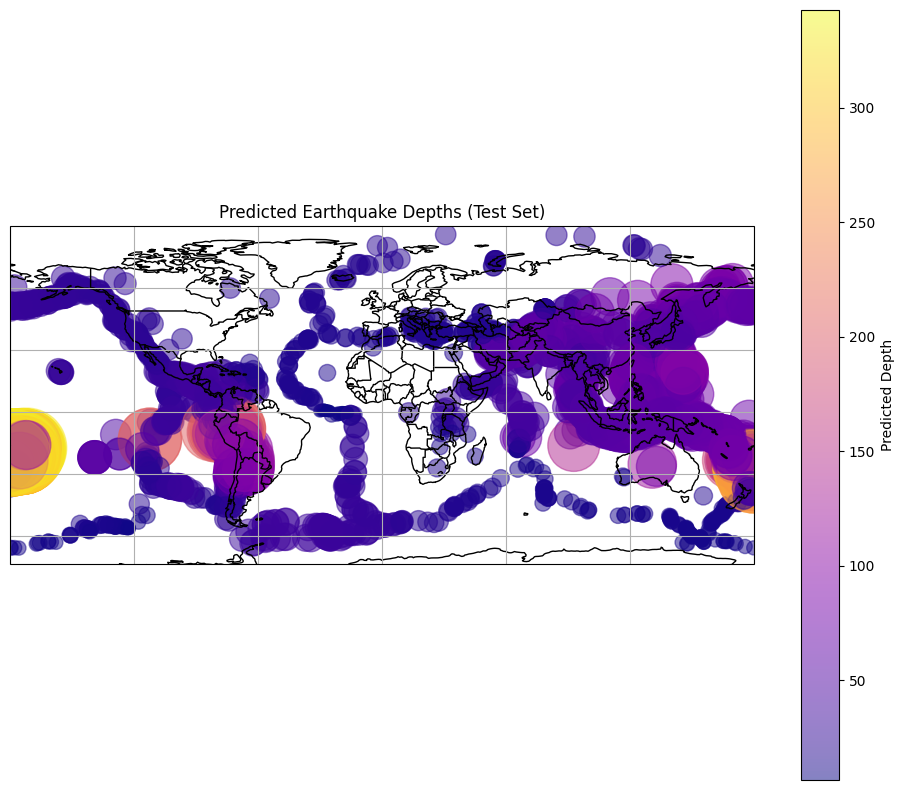

In [28]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(y_test_array[:, 1], bins=30, alpha=0.7, color='blue', label='Actual Depth')
plt.title('Distribution of Actual Depths')
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(y_depth_pred, bins=30, alpha=0.7, color='orange', label='Predicted Depth')
plt.title('Distribution of Predicted Depths')
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title("Predicted Earthquake Depths (Test Set)")

sc = ax.scatter(X_test["Longitude"], X_test["Latitude"], transform=ccrs.PlateCarree(), s=y_depth_pred*10, c=y_depth_pred, cmap='plasma', alpha=0.5)
plt.colorbar(sc, label='Predicted Depth')

ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.gridlines()

plt.show()

# Scale the Data and apply the model

# **Neural network Model 2**

In [29]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np

def create_model(neurons=64, activation='relu', optimizer='adam', loss='mean_squared_error'):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(0.2))
    model.add(Dense(neurons, activation=activation))
    model.add(Dropout(0.2))
    model.add(Dense(2))
    model.compile(optimizer=optimizer, loss=loss, metrics=['mae', 'mse'])
    return model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KerasRegressor(model=create_model, batch_size=32, epochs=20, verbose=0)

param_grid = {
    'model__neurons': [16, 32, 64],
    'model__activation': ['relu', 'tanh'],
    'model__optimizer': ['adam', 'rmsprop']
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train_scaled, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

best_model = grid_result.best_estimator_

history = best_model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test))

[test_loss, test_mae, test_mse] = best_model.model_.evaluate(X_test_scaled, y_test)
print("Evaluation result on Test Data : Loss = {}, MAE = {}, MSE = {}".format(test_loss, test_mae, test_mse))

y_pred = best_model.predict(X_test_scaled)

y_test_array = np.array(y_test)

y_magnitude_pred = y_pred[:, 0]

magnitude_mae = mean_absolute_error(y_test_array[:, 0], y_magnitude_pred)
magnitude_mse = mean_squared_error(y_test_array[:, 0], y_magnitude_pred)

print("\nMagnitude Prediction Error Metrics:")
print("Mean Absolute Error (MAE) for Magnitude Prediction:", magnitude_mae)
print("Mean Squared Error (MSE) for Magnitude Prediction:", magnitude_mse)

y_depth_pred = y_pred[:, 1]

depth_mae = mean_absolute_error(y_test_array[:, 1], y_depth_pred)
depth_mse = mean_squared_error(y_test_array[:, 1], y_depth_pred)

print("\nDepth Prediction Error Metrics:")
print("Mean Absolute Error (MAE) for Depth Prediction:", depth_mae)
print("Mean Squared Error (MSE) for Depth Prediction:", depth_mse)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best: 0.003333 using {'model__activation': 'tanh', 'model__neurons': 64, 'model__optimizer': 'adam'}
-0.074658 (0.034213) with: {'model__activation': 'relu', 'model__neurons': 16, 'model__optimizer': 'adam'}
-0.010372 (0.029482) with: {'model__activation': 'relu', 'model__neurons': 16, 'model__optimizer': 'rmsprop'}
-0.105952 (0.022091) with: {'model__activation': 'relu', 'model__neurons': 32, 'model__optimizer': 'adam'}
-0.016785 (0.033913) with: {'model__activation': 'relu', 'model__neurons': 32, 'model__optimizer': 'rmsprop'}
-0.163064 (0.035788) with: {'model__activation': 'relu', 'model__neurons': 64, 'model__optimizer': 'adam'}
-0.006398 (0.025098) with: {'model__activation': 'relu', 'model__neurons': 64, 'model__optimizer': 'rmsprop'}
-0.134506 (0.061750) with: {'model__activation': 'tanh', 'model__neurons': 16, 'model__optimizer': 'adam'}
-0.001894 (0.006176) with: {'model__activation': 'tanh', 'model__neurons': 16, 'model__optimizer': 'rmsprop'}
-0.029029 (0.032192) with: {'mo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6272.5303 - mae: 32.3345 - mse: 6272.5303
Evaluation result on Test Data : Loss = 6526.1171875, MAE = 32.716278076171875, MSE = 6526.1171875

Magnitude Prediction Error Metrics:
Mean Absolute Error (MAE) for Magnitude Prediction: 0.32853136969040425
Mean Squared Error (MSE) for Magnitude Prediction: 0.20198628287965473

Depth Prediction Error Metrics:
Mean Absolute Error (MAE) for Depth Prediction: 65.10403457233734
Mean Squared Error (MSE) for Depth Prediction: 13052.035122252639


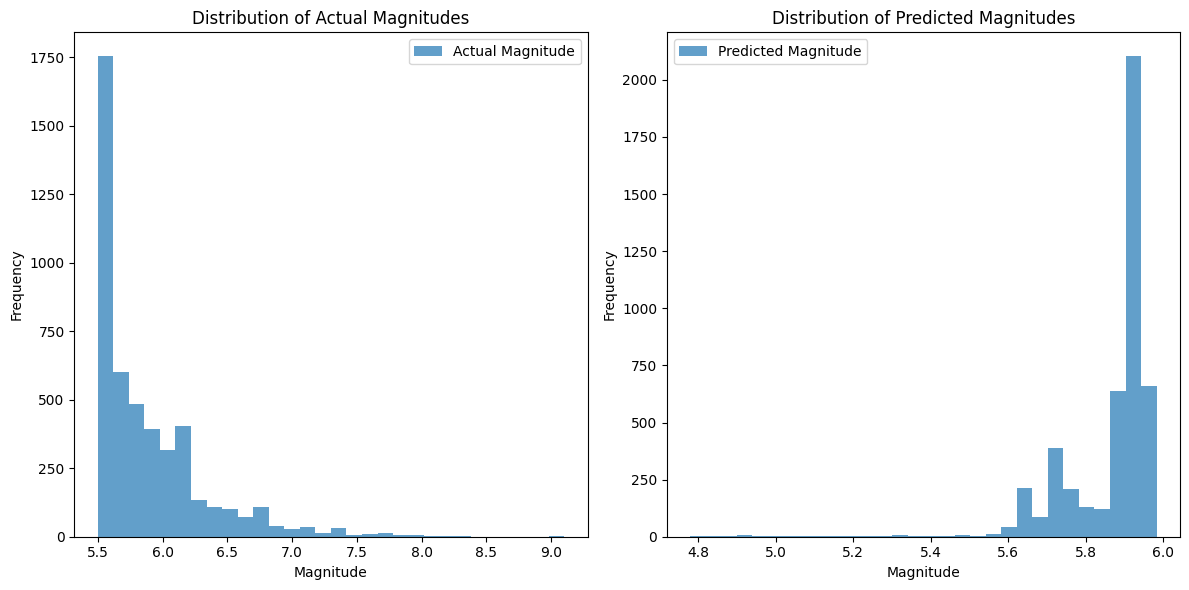

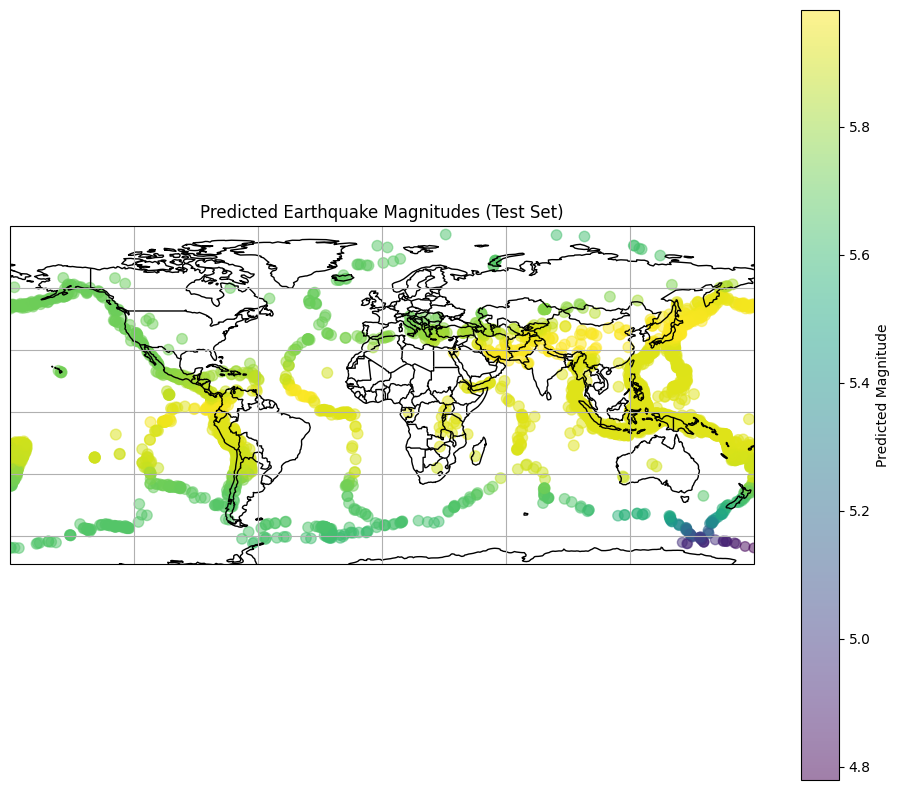

In [30]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(y_test_array[:, 0], bins=30, alpha=0.7, label='Actual Magnitude')
plt.title('Distribution of Actual Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(y_magnitude_pred, bins=30, alpha=0.7, label='Predicted Magnitude')
plt.title('Distribution of Predicted Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title("Predicted Earthquake Magnitudes (Test Set)")

sc = ax.scatter(X_test["Longitude"], X_test["Latitude"], transform=ccrs.PlateCarree(), s=y_magnitude_pred*10, c=y_magnitude_pred, cmap='viridis', alpha=0.5)

plt.colorbar(sc, label='Predicted Magnitude')

ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.gridlines()

plt.show()

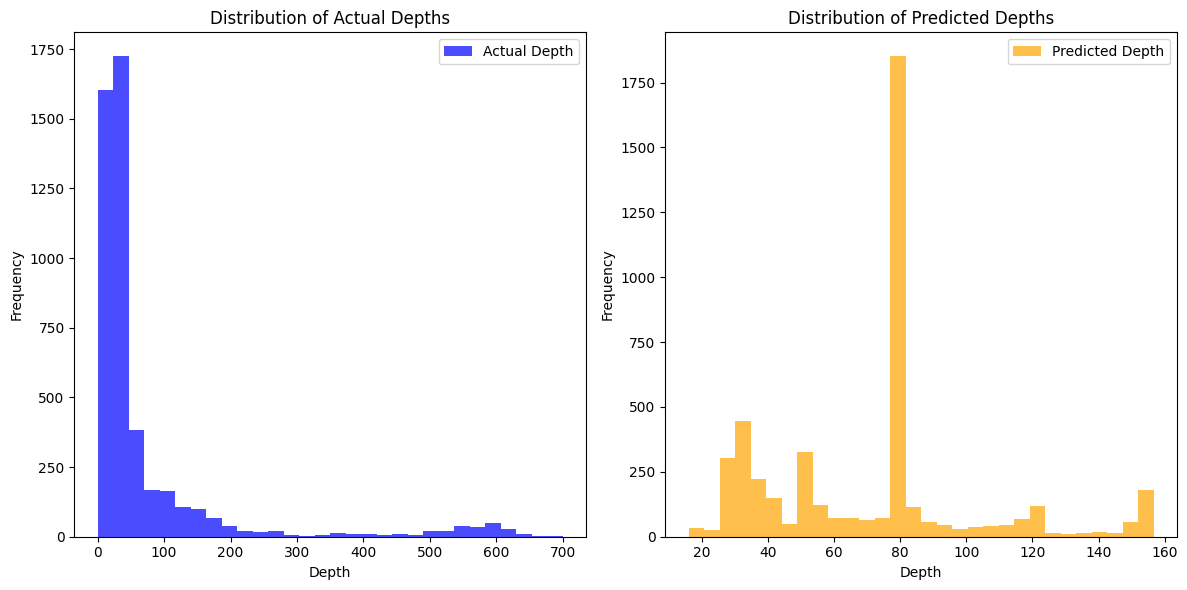

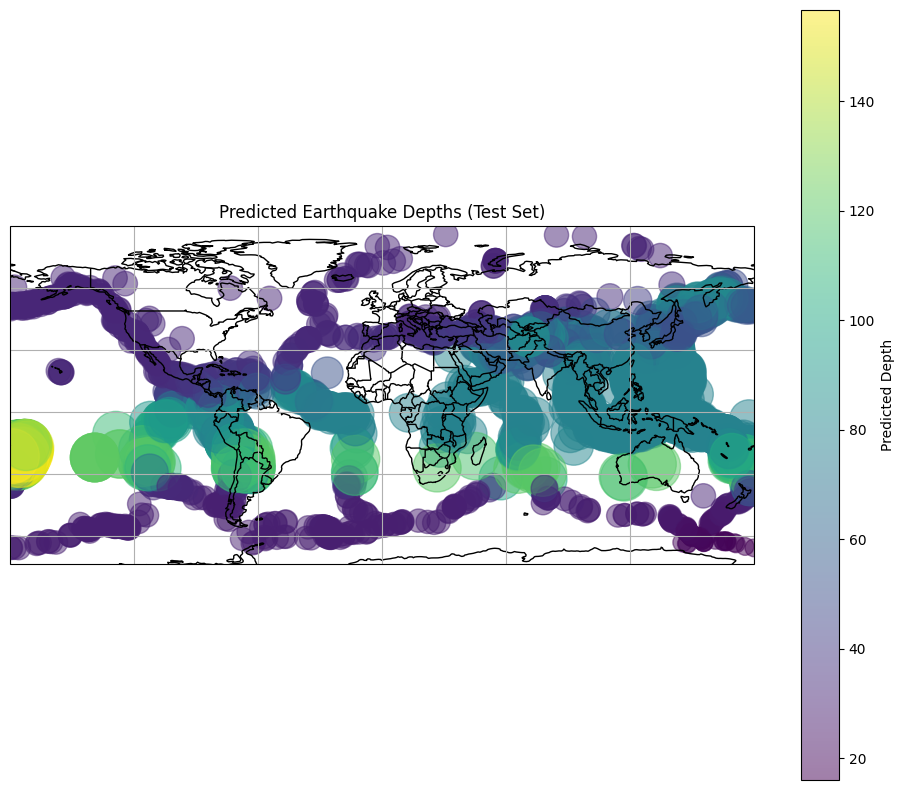

In [31]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(y_test_array[:, 1], bins=30, alpha=0.7, color='blue', label='Actual Depth')
plt.title('Distribution of Actual Depths')
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(y_depth_pred, bins=30, alpha=0.7, color='orange', label='Predicted Depth')
plt.title('Distribution of Predicted Depths')
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title("Predicted Earthquake Depths (Test Set)")

sc = ax.scatter(X_test["Longitude"], X_test["Latitude"], transform=ccrs.PlateCarree(), s=y_depth_pred*10, c=y_depth_pred, cmap='viridis', alpha=0.5)

plt.colorbar(sc, label='Predicted Depth')

ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.gridlines()

plt.show()

# Scale the data

# Neural network Model 3



In [32]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='linear'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'mse'])

from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train, batch_size=32, epochs=100, verbose=1, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

[test_loss, test_mae, test_mse] = model.evaluate(X_test_scaled, y_test)
print("Evaluation result on Test Data : Loss = {}, MAE = {}, MSE = {}".format(test_loss, test_mae, test_mse))

y_pred = model.predict(X_test_scaled)

y_test_array = np.array(y_test)

y_magnitude_pred = y_pred[:, 0]

magnitude_mae = mean_absolute_error(y_test_array[:, 0], y_magnitude_pred)
magnitude_mse = mean_squared_error(y_test_array[:, 0], y_magnitude_pred)

print("\nMagnitude Prediction Error Metrics:")
print("Mean Absolute Error (MAE) for Magnitude Prediction:", magnitude_mae)
print("Mean Squared Error (MSE) for Magnitude Prediction:", magnitude_mse)

y_depth_pred = y_pred[:, 1]

depth_mae = mean_absolute_error(y_test_array[:, 1], y_depth_pred)
depth_mse = mean_squared_error(y_test_array[:, 1], y_depth_pred)

print("\nDepth Prediction Error Metrics:")
print("Mean Absolute Error (MAE) for Depth Prediction:", depth_mae)
print("Mean Squared Error (MSE) for Depth Prediction:", depth_mse)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 8432.1641 - mae: 34.0002 - mse: 8432.1641 - val_loss: 7272.8550 - val_mae: 35.0970 - val_mse: 7272.8550
Epoch 2/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 7185.0005 - mae: 35.2545 - mse: 7185.0005 - val_loss: 7176.6118 - val_mae: 35.7276 - val_mse: 7176.6118
Epoch 3/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6863.9541 - mae: 34.0481 - mse: 6863.9541 - val_loss: 7039.9829 - val_mae: 35.3355 - val_mse: 7039.9829
Epoch 4/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6875.4927 - mae: 33.9635 - mse: 6875.4927 - val_loss: 6913.7964 - val_mae: 33.2337 - val_mse: 6913.7964
Epoch 5/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7133.0986 - mae: 34.0776 - mse: 7133.0986 - val_loss: 6816.8101 - val_mae: 33.4141 - val_mse: 6816.8101
Epoch 6/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6876.0986 - mae: 33.8469 - mse: 6876.0986 - val_loss: 6822.0146 - val_mae: 33.7692 - val_mse: 6822.0146
Epoch 7/100
586/586 ━━

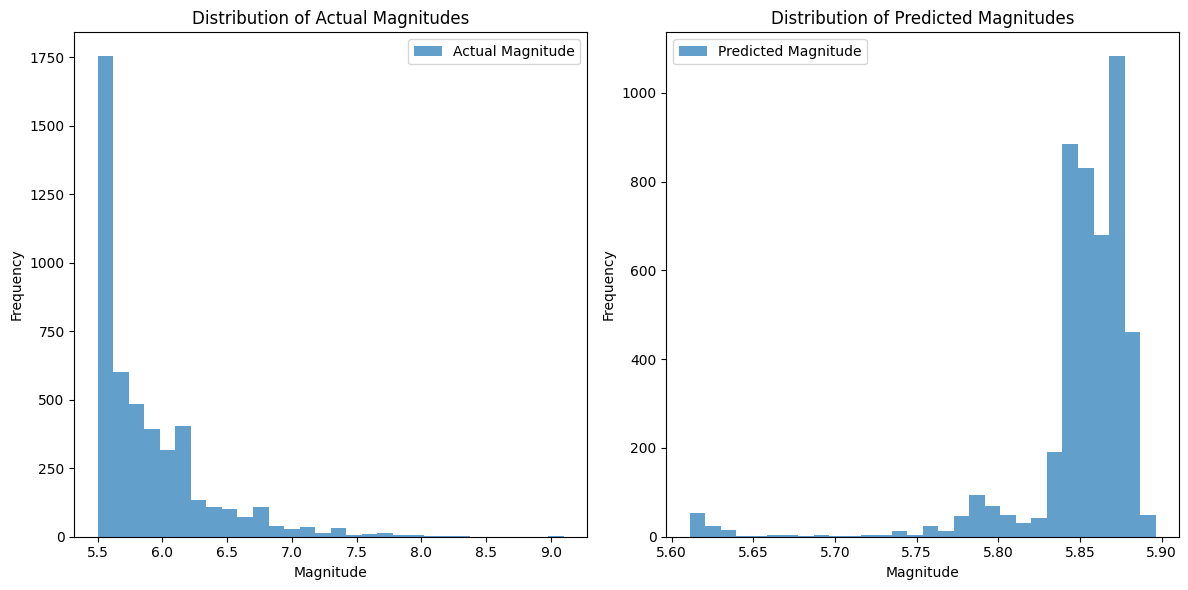

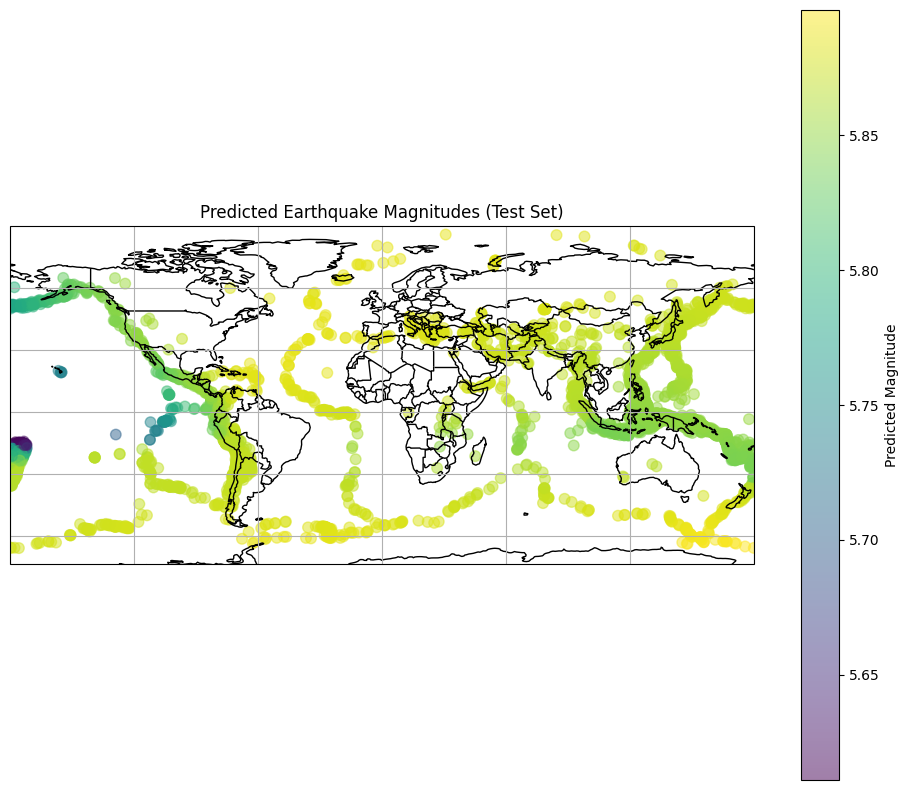

In [33]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(y_test_array[:, 0], bins=30, alpha=0.7, label='Actual Magnitude')
plt.title('Distribution of Actual Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(y_magnitude_pred, bins=30, alpha=0.7, label='Predicted Magnitude')
plt.title('Distribution of Predicted Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title("Predicted Earthquake Magnitudes (Test Set)")

sc = ax.scatter(X_test["Longitude"], X_test["Latitude"], transform=ccrs.PlateCarree(), s=y_magnitude_pred*10, c=y_magnitude_pred, cmap='viridis', alpha=0.5)

plt.colorbar(sc, label='Predicted Magnitude')

ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.gridlines()

plt.show()

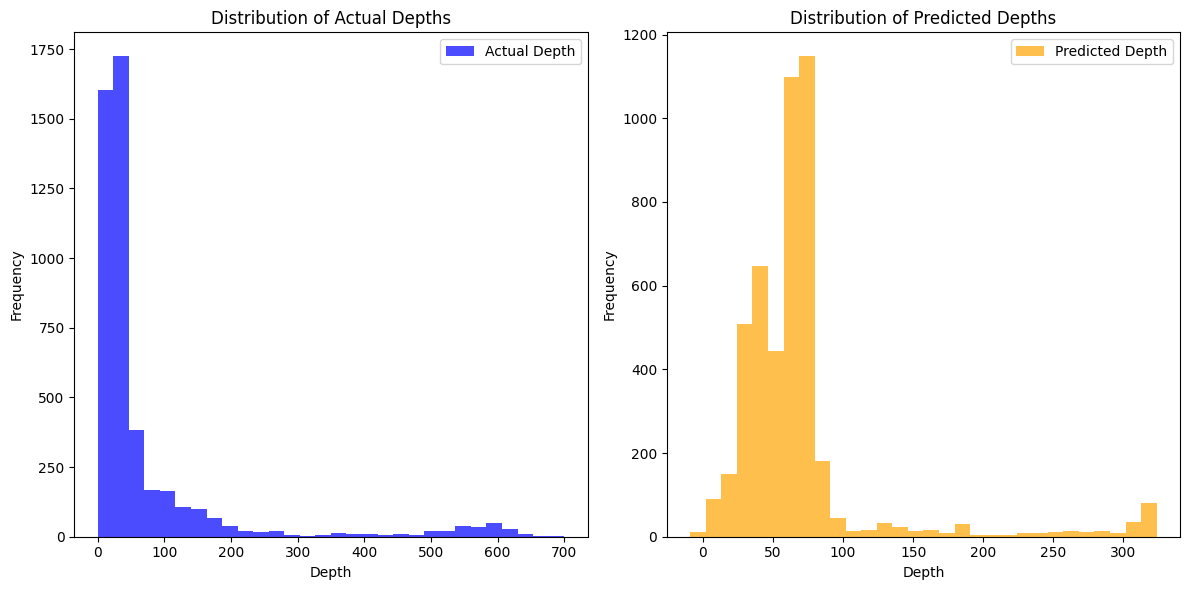

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


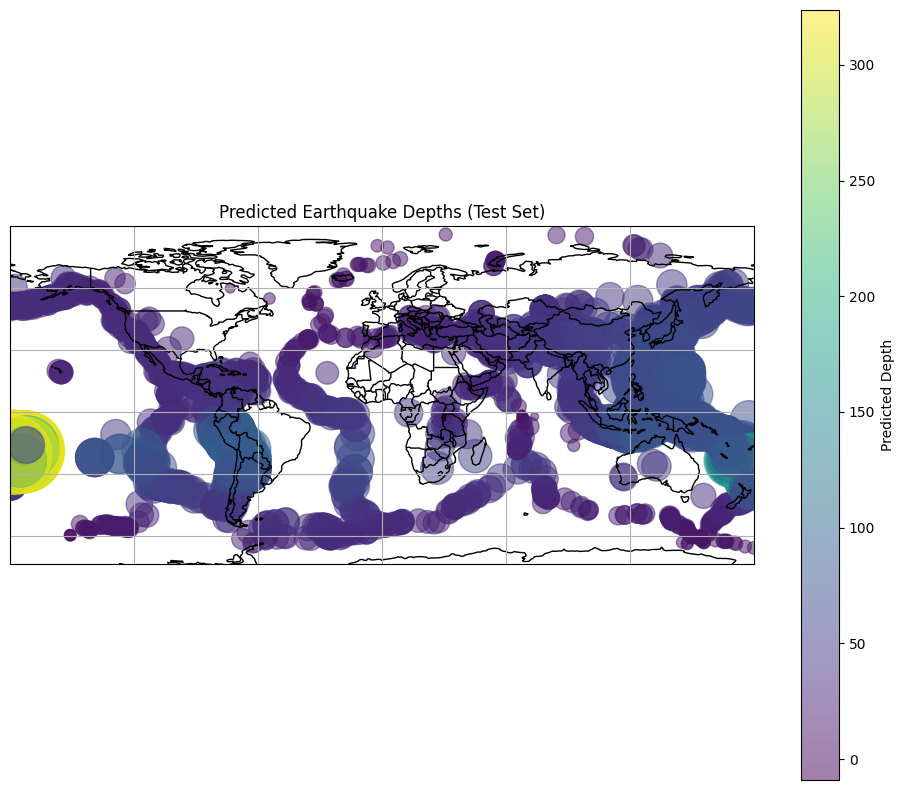

In [34]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(y_test_array[:, 1], bins=30, alpha=0.7, color='blue', label='Actual Depth')
plt.title('Distribution of Actual Depths')
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(y_depth_pred, bins=30, alpha=0.7, color='orange', label='Predicted Depth')
plt.title('Distribution of Predicted Depths')
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title("Predicted Earthquake Depths (Test Set)")

sc = ax.scatter(X_test["Longitude"], X_test["Latitude"], transform=ccrs.PlateCarree(), s=y_depth_pred*10, c=y_depth_pred, cmap='viridis', alpha=0.5)

plt.colorbar(sc, label='Predicted Depth')

ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.gridlines()

plt.show()

# LSTM


In [35]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

model = Sequential()
model.add(LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(2))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

history = model.fit(X_train_reshaped, y_train, batch_size=32, epochs=100, verbose=1, validation_data=(X_test_reshaped, y_test))

[test_loss, test_mae, test_mse] = model.evaluate(X_test_reshaped, y_test)
print("Evaluation result on Test Data : Loss = {}, MAE = {}, MSE = {}".format(test_loss, test_mae, test_mse))

y_pred = model.predict(X_test_reshaped)

y_test_array = np.array(y_test)

y_magnitude_pred = y_pred[:, 0]

magnitude_mae = mean_absolute_error(y_test_array[:, 0], y_magnitude_pred)
magnitude_mse = mean_squared_error(y_test_array[:, 0], y_magnitude_pred)

print("\nMagnitude Prediction Error Metrics:")
print("Mean Absolute Error (MAE) for Magnitude Prediction:", magnitude_mae)
print("Mean Squared Error (MSE) for Magnitude Prediction:", magnitude_mse)

y_depth_pred = y_pred[:, 1]

depth_mae = mean_absolute_error(y_test_array[:, 1], y_depth_pred)
depth_mse = mean_squared_error(y_test_array[:, 1], y_depth_pred)

print("\nDepth Prediction Error Metrics:")
print("Mean Absolute Error (MAE) for Depth Prediction:", depth_mae)
print("Mean Squared Error (MSE) for Depth Prediction:", depth_mse)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 9469.6904 - mae: 34.1721 - mse: 9469.6904 - val_loss: 8009.2891 - val_mae: 28.1544 - val_mse: 8009.2891
Epoch 2/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 7989.8003 - mae: 29.3181 - mse: 7989.8003 - val_loss: 7630.4077 - val_mae: 31.4005 - val_mse: 7630.4077
Epoch 3/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 7425.1519 - mae: 31.8220 - mse: 7425.1519 - val_loss: 7486.5083 - val_mae: 33.0091 - val_mse: 7486.5083
Epoch 4/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 7279.8022 - mae: 32.9629 - mse: 7279.8022 - val_loss: 7424.2852 - val_mae: 34.0347 - val_mse: 7424.2852
Epoch 5/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 7155.8848 - mae: 33.7885 - mse: 7155.8848 - val_loss: 7385.5479 - val_mae: 34.1695 - val_mse: 7385.5479
Epoch 6/100
586/586 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 7426.6792 - mae: 34.3856 - mse: 7426.6792 - val_loss: 7353.1455 - val_mae: 34.3011 - val_mse: 7353.1455
Epoch 7/1

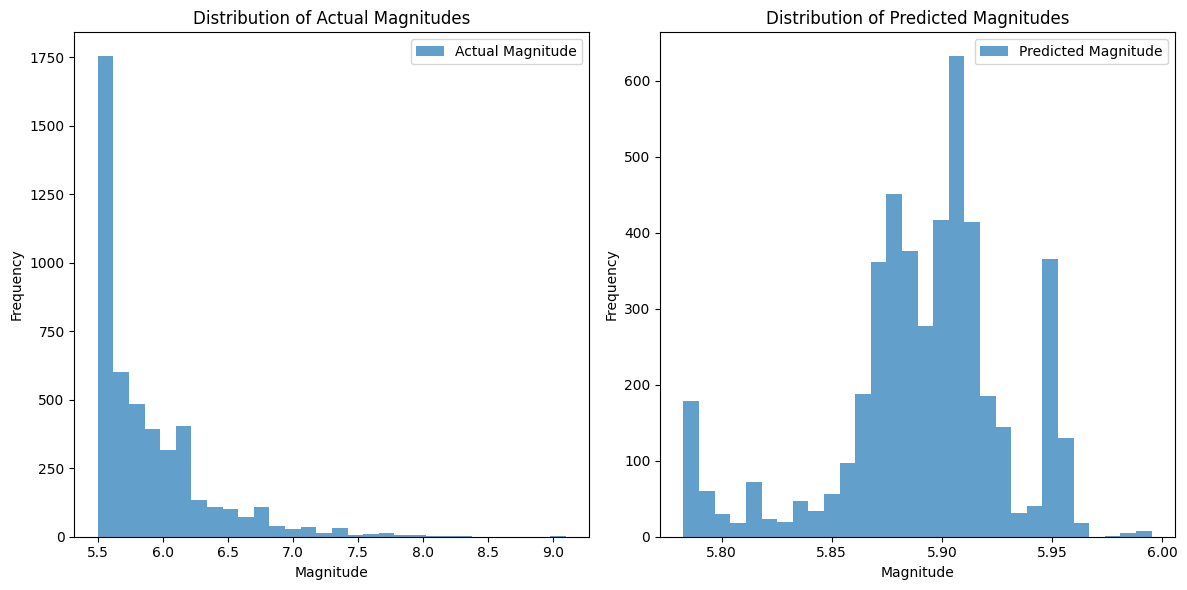

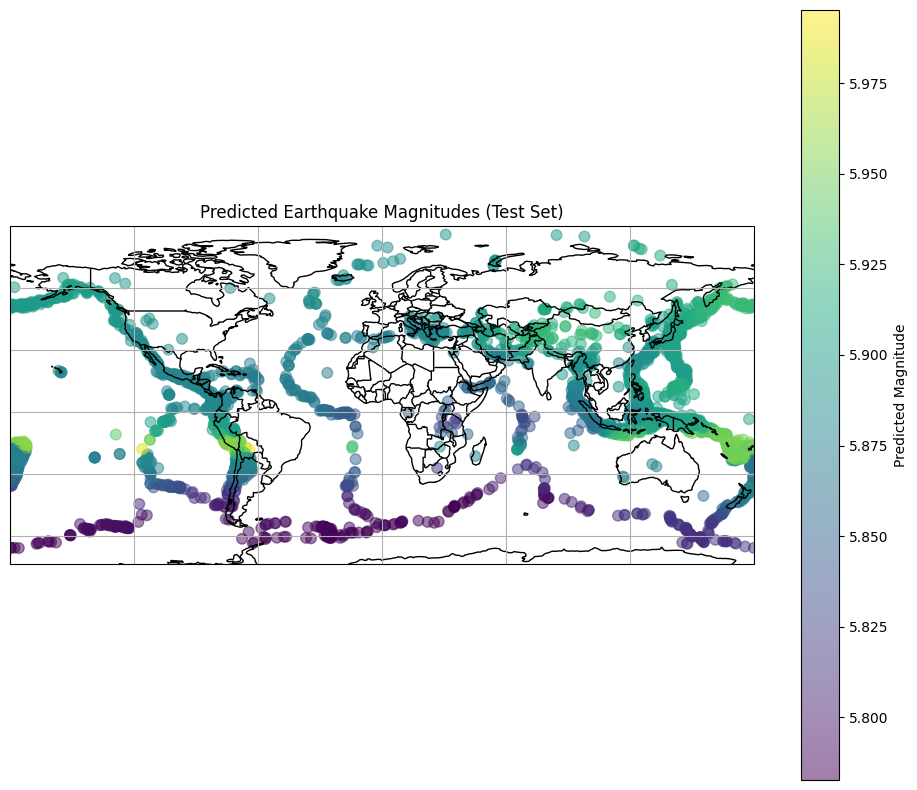

In [36]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(y_test_array[:, 0], bins=30, alpha=0.7, label='Actual Magnitude')
plt.title('Distribution of Actual Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(y_magnitude_pred, bins=30, alpha=0.7, label='Predicted Magnitude')
plt.title('Distribution of Predicted Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title("Predicted Earthquake Magnitudes (Test Set)")

sc = ax.scatter(X_test["Longitude"], X_test["Latitude"], transform=ccrs.PlateCarree(), s=y_magnitude_pred*10, c=y_magnitude_pred, cmap='viridis', alpha=0.5)

plt.colorbar(sc, label='Predicted Magnitude')

ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.gridlines()

plt.show()

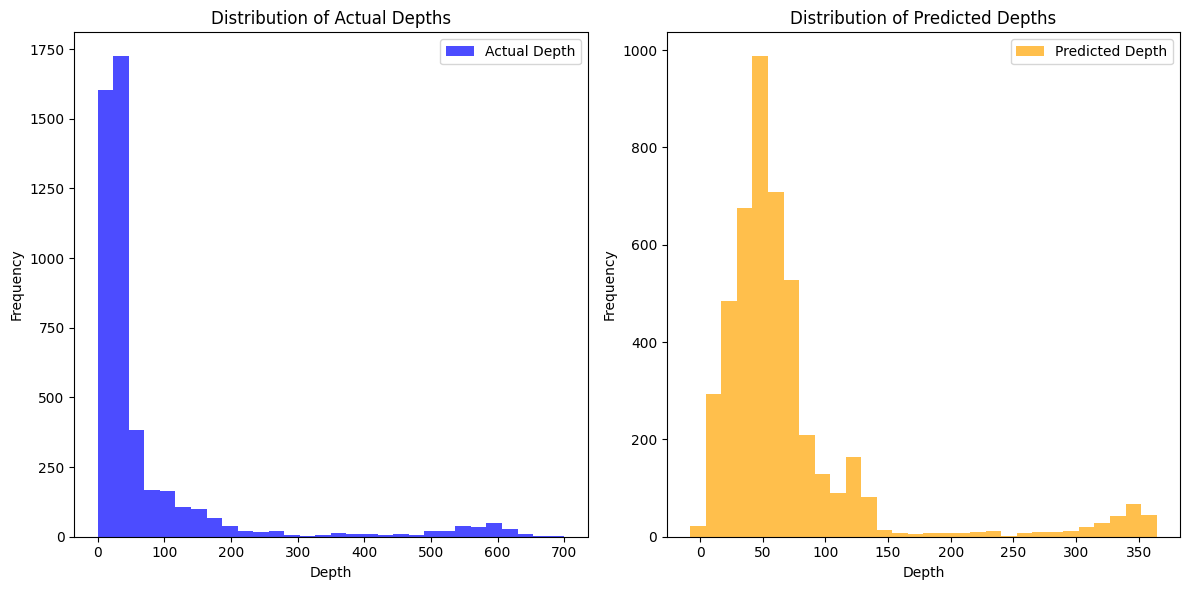

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


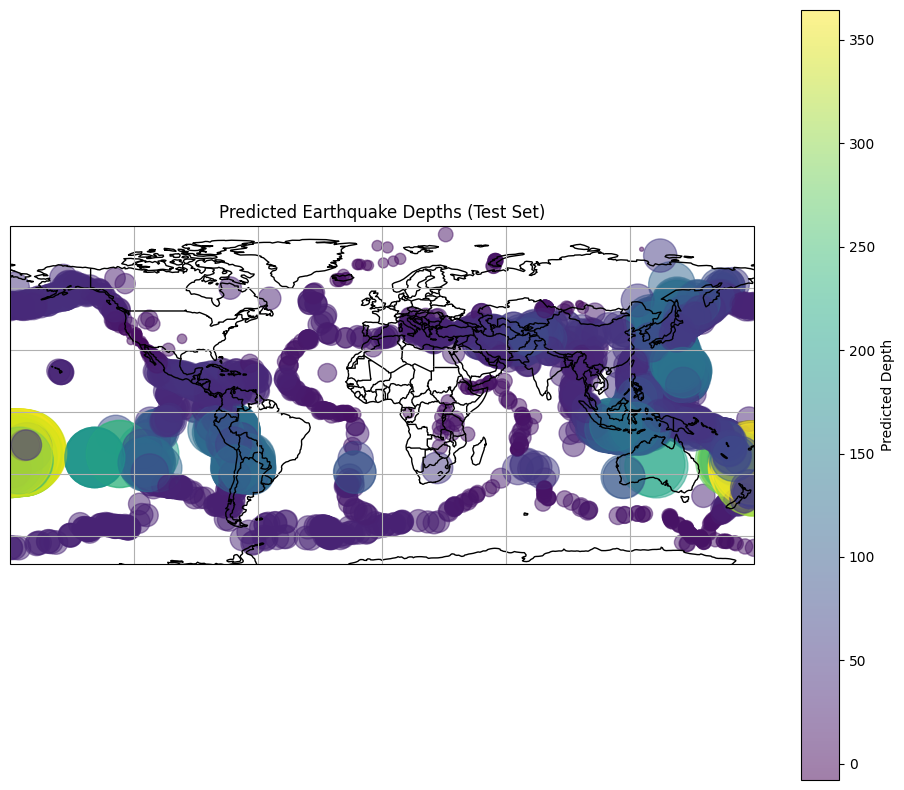

In [37]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(y_test_array[:, 1], bins=30, alpha=0.7, color='blue', label='Actual Depth')
plt.title('Distribution of Actual Depths')
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(y_depth_pred, bins=30, alpha=0.7, color='orange', label='Predicted Depth')
plt.title('Distribution of Predicted Depths')
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title("Predicted Earthquake Depths (Test Set)")

sc = ax.scatter(X_test["Longitude"], X_test["Latitude"], transform=ccrs.PlateCarree(), s=y_depth_pred*10, c=y_depth_pred, cmap='viridis', alpha=0.5)

plt.colorbar(sc, label='Predicted Depth')

ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.gridlines()

plt.show()

In [38]:
import plotly.express as px
import pandas as pd

if not isinstance(y_test, pd.DataFrame):
    y_test = pd.DataFrame(y_test, columns=['Magnitude', 'Depth'])

plot_data = X_test.copy()
plot_data['Magnitude'] = y_magnitude_pred


center_latitude = 37.0902
center_longitude = -95.7129

fig = px.scatter_geo(plot_data,
                     lat='Latitude',
                     lon='Longitude',
                     color='Magnitude',
                     hover_name='Magnitude',
                     size_max=20,
                     projection="natural earth",
                     title="Predicted Earthquake Magnitudes (Test Set)",
                     size='Magnitude',
                     center={'lat': center_latitude, 'lon': center_longitude})

fig.update_geos(showcountries=True, coastlinecolor="RebeccaPurple", showland=True, showocean=True, showlakes=True)
fig.show()